# 3
## 3.5

In [1]:
# List 3-12
%matplotlib inline

from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
# List 3-13

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
train_labels[10]

3

In [7]:
# List 3-14

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels  = to_one_hot(test_labels)

## 3.5.3

In [9]:
# List 3-15

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

W0816 16:29:01.659508 140653700411520 deprecation.py:506] From /home/takao/.pyenv/versions/3.7.4/envs/Jupyter/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
# List 3-16
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## 3.5.4

In [11]:
# List 3-17

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
# List 3-18

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 81us/sample - loss: 2.6150 - acc: 0.5026 - val_loss: 1.6725 - val_acc: 0.6540
Epoch 2/20
7982/7982 [==============================] - 0s 60us/sample - loss: 1.3891 - acc: 0.7132 - val_loss: 1.2974 - val_acc: 0.7280
Epoch 3/20
7982/7982 [==============================] - 0s 57us/sample - loss: 1.0518 - acc: 0.7796 - val_loss: 1.1295 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 0s 60us/sample - loss: 0.8331 - acc: 0.8295 - val_loss: 1.0485 - val_acc: 0.7850
Epoch 5/20
7982/7982 [==============================] - 0s 51us/sample - loss: 0.6735 - acc: 0.8581 - val_loss: 0.9727 - val_acc: 0.8100
Epoch 6/20
7982/7982 [==============================] - 0s 51us/sample - loss: 0.5395 - acc: 0.8867 - val_loss: 0.9360 - val_acc: 0.8200
Epoch 7/20
7982/7982 [==============================] - 0s 60us/sample - loss: 0.4388 - acc: 0.9087 - val_loss: 0.9174 - val_acc: 

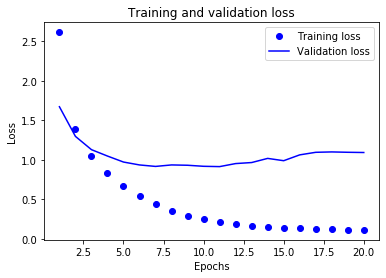

In [13]:
# List 3-19

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

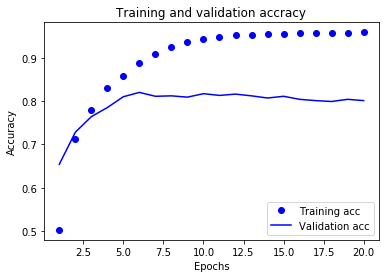

In [14]:
# List 3-20

plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
# List 3-21

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 85us/sample - loss: 2.4802 - acc: 0.5608 - val_loss: 1.6169 - val_acc: 0.6620
Epoch 2/8
7982/7982 [==============================] - 1s 72us/sample - loss: 1.3317 - acc: 0.7187 - val_loss: 1.2489 - val_acc: 0.7280
Epoch 3/8
7982/7982 [==============================] - 1s 73us/sample - loss: 1.0007 - acc: 0.7855 - val_loss: 1.1012 - val_acc: 0.7610
Epoch 4/8
7982/7982 [==============================] - 1s 72us/sample - loss: 0.7910 - acc: 0.8292 - val_loss: 1.0284 - val_acc: 0.7790
Epoch 5/8
7982/7982 [==============================] - 1s 74us/sample - loss: 0.6329 - acc: 0.8638 - val_loss: 0.9637 - val_acc: 0.7810
Epoch 6/8
7982/7982 [==============================] - 1s 75us/sample - loss: 0.5121 - acc: 0.8911 - val_loss: 0.9159 - val_acc: 0.8060
Epoch 7/8
7982/7982 [==============================] - 1s 74us/sample - loss: 0.4098 - acc: 0.9148 - val_loss: 0.9094 - val_acc: 0.8140


[0.9908148418657502, 0.7885129]

In [16]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.188780053428317

## 3.5.5

In [17]:
# List 3-22

predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [18]:
np.sum(predictions[0])

1.0000001

In [19]:
np.argmax(predictions[0])

3

## 3.5.6

In [20]:
y_train = np.array(train_labels)
y_test  = np.array(test_labels)

In [21]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 75us/sample - loss: 2.6912 - acc: 0.4912 - val_loss: 1.7715 - val_acc: 0.6440
Epoch 2/8
7982/7982 [==============================] - 0s 52us/sample - loss: 1.4495 - acc: 0.6999 - val_loss: 1.3190 - val_acc: 0.7110
Epoch 3/8
7982/7982 [==============================] - 0s 62us/sample - loss: 1.0774 - acc: 0.7724 - val_loss: 1.1443 - val_acc: 0.7460
Epoch 4/8
7982/7982 [==============================] - 0s 61us/sample - loss: 0.8547 - acc: 0.8231 - val_loss: 1.0625 - val_acc: 0.7620
Epoch 5/8
7982/7982 [==============================] - 1s 67us/sample - loss: 0.6817 - acc: 0.8608 - val_loss: 0.9868 - val_acc: 0.7940
Epoch 6/8
7982/7982 [==============================] - 0s 58us/sample - loss: 0.5449 - acc: 0.8884 - val_loss: 0.9458 - val_acc: 0.7970
Epoch 7/8
7982/7982 [==============================] - 0s 57us/sample - loss: 0.4368 - acc: 0.9110 - val_loss: 0.9168 - val_acc: 0.8060


[1.0250383121884517, 0.7738201]

## 3.5.7

In [22]:
x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels  = to_one_hot(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# List 3-23
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 112us/sample - loss: 2.6174 - acc: 0.4246 - val_loss: 2.0068 - val_acc: 0.4620
Epoch 2/20
7982/7982 [==============================] - 1s 86us/sample - loss: 1.7450 - acc: 0.5799 - val_loss: 1.6035 - val_acc: 0.6040
Epoch 3/20
7982/7982 [==============================] - 1s 87us/sample - loss: 1.4058 - acc: 0.6262 - val_loss: 1.4487 - val_acc: 0.6340
Epoch 4/20
7982/7982 [==============================] - 1s 84us/sample - loss: 1.2123 - acc: 0.6715 - val_loss: 1.3611 - val_acc: 0.6540
Epoch 5/20
7982/7982 [==============================] - 1s 85us/sample - loss: 1.0713 - acc: 0.6923 - val_loss: 1.3066 - val_acc: 0.6670
Epoch 6/20
7982/7982 [==============================] - 1s 83us/sample - loss: 0.9585 - acc: 0.7328 - val_loss: 1.2871 - val_acc: 0.6920
Epoch 7/20
7982/7982 [==============================] - 1s 82us/sample - loss: 0.8654 - acc: 0.7709 - val_loss: 1.3079 - val_acc:

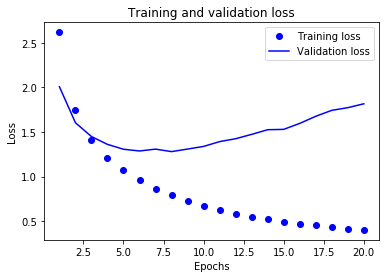

In [23]:
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

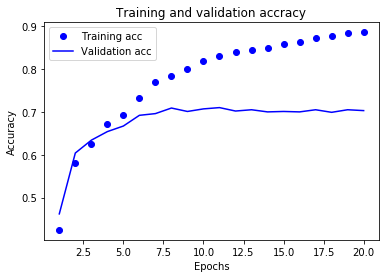

In [24]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3.5.8
### 小さい中間層

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 101us/sample - loss: 1.9622 - acc: 0.6026 - val_loss: 1.3501 - val_acc: 0.6970
Epoch 2/20
7982/7982 [==============================] - 1s 88us/sample - loss: 1.0427 - acc: 0.7726 - val_loss: 1.0597 - val_acc: 0.7690
Epoch 3/20
7982/7982 [==============================] - 1s 87us/sample - loss: 0.7313 - acc: 0.8420 - val_loss: 0.9574 - val_acc: 0.8020
Epoch 4/20
7982/7982 [==============================] - 1s 85us/sample - loss: 0.5340 - acc: 0.8842 - val_loss: 0.8959 - val_acc: 0.8150
Epoch 5/20
7982/7982 [==============================] - 1s 87us/sample - loss: 0.3924 - acc: 0.9158 - val_loss: 0.9449 - val_acc: 0.8040
Epoch 6/20
7982/7982 [==============================] - 1s 83us/sample - loss: 0.3046 - acc: 0.9325 - val_loss: 0.8931 - val_acc: 0.8250
Epoch 7/20
7982/7982 [==============================] - 1s 84us/sample - loss: 0.2434 - acc: 0.9436 - val_loss: 0.9209 - val_acc:

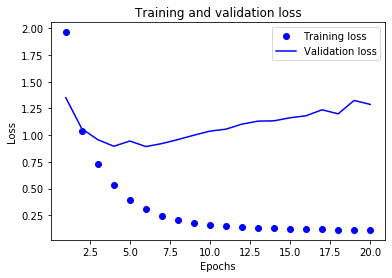

In [26]:
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

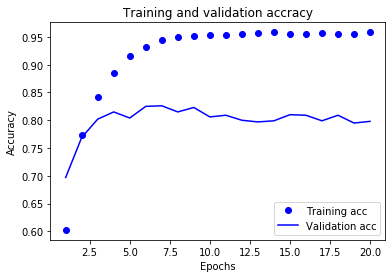

In [27]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 大きい中間層

In [28]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 99us/sample - loss: 1.7568 - acc: 0.6319 - val_loss: 1.2244 - val_acc: 0.7160
Epoch 2/20
7982/7982 [==============================] - 1s 84us/sample - loss: 0.9414 - acc: 0.7949 - val_loss: 0.9769 - val_acc: 0.7880
Epoch 3/20
7982/7982 [==============================] - 1s 86us/sample - loss: 0.6177 - acc: 0.8629 - val_loss: 0.8845 - val_acc: 0.8120
Epoch 4/20
7982/7982 [==============================] - 1s 85us/sample - loss: 0.4211 - acc: 0.9112 - val_loss: 0.9016 - val_acc: 0.8200
Epoch 5/20
7982/7982 [==============================] - 1s 85us/sample - loss: 0.3006 - acc: 0.9342 - val_loss: 0.8933 - val_acc: 0.8260
Epoch 6/20
7982/7982 [==============================] - 1s 85us/sample - loss: 0.2386 - acc: 0.9456 - val_loss: 0.9210 - val_acc: 0.8290
Epoch 7/20
7982/7982 [==============================] - 1s 85us/sample - loss: 0.1960 - acc: 0.9496 - val_loss: 0.9525 - val_acc: 

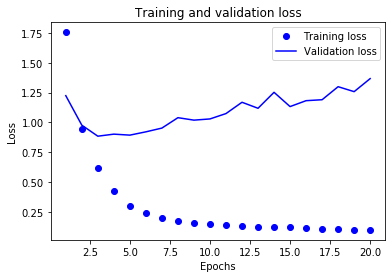

In [29]:
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

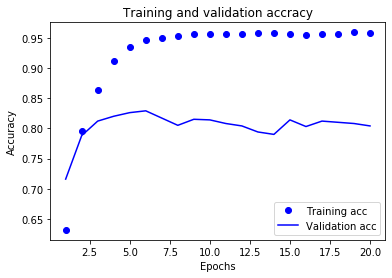

In [30]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 隠れ層を1つにする

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 89us/sample - loss: 2.5795 - acc: 0.5470 - val_loss: 1.8070 - val_acc: 0.6580
Epoch 2/20
7982/7982 [==============================] - 1s 75us/sample - loss: 1.4711 - acc: 0.7112 - val_loss: 1.3349 - val_acc: 0.7180
Epoch 3/20
7982/7982 [==============================] - 1s 77us/sample - loss: 1.0691 - acc: 0.7784 - val_loss: 1.1408 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 83us/sample - loss: 0.8337 - acc: 0.8315 - val_loss: 1.0212 - val_acc: 0.7920
Epoch 5/20
7982/7982 [==============================] - 1s 76us/sample - loss: 0.6675 - acc: 0.8703 - val_loss: 0.9419 - val_acc: 0.8090
Epoch 6/20
7982/7982 [==============================] - 1s 84us/sample - loss: 0.5431 - acc: 0.8931 - val_loss: 0.8922 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 76us/sample - loss: 0.4489 - acc: 0.9119 - val_loss: 0.8562 - val_acc: 

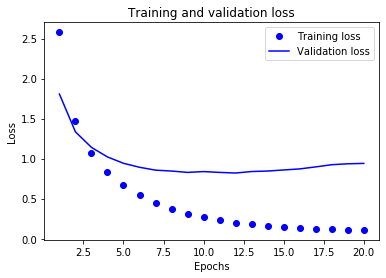

In [32]:
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

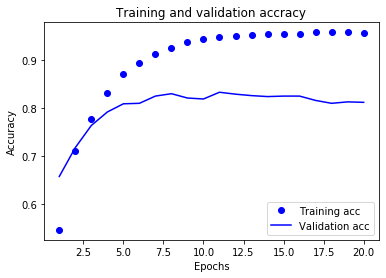

In [33]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 隠れ層を3つにする

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 106us/sample - loss: 2.6118 - acc: 0.4650 - val_loss: 1.7274 - val_acc: 0.6080
Epoch 2/20
7982/7982 [==============================] - 1s 79us/sample - loss: 1.4551 - acc: 0.6832 - val_loss: 1.3481 - val_acc: 0.6910
Epoch 3/20
7982/7982 [==============================] - 1s 82us/sample - loss: 1.1056 - acc: 0.7517 - val_loss: 1.2084 - val_acc: 0.7250
Epoch 4/20
7982/7982 [==============================] - 1s 73us/sample - loss: 0.8873 - acc: 0.8032 - val_loss: 1.0919 - val_acc: 0.7690
Epoch 5/20
7982/7982 [==============================] - 1s 70us/sample - loss: 0.7066 - acc: 0.8457 - val_loss: 1.0184 - val_acc: 0.7890
Epoch 6/20
7982/7982 [==============================] - 0s 55us/sample - loss: 0.5734 - acc: 0.8728 - val_loss: 0.9771 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 71us/sample - loss: 0.4576 - acc: 0.8984 - val_loss: 0.9439 - val_acc:

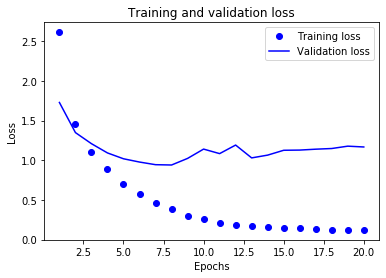

In [35]:
plt.clf()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

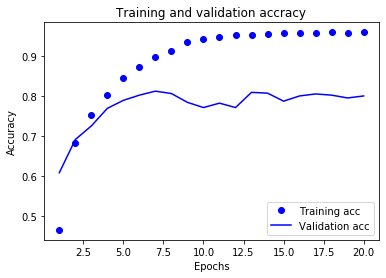

In [36]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()